In [17]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import json
from bib.cleaning import *
from bib.plot import *
import math


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
a = get_all_data()

In [7]:
a

,Contato_idade,id,Idade
0,24.0,Belgica2006_0,22.0
1,22.0,Belgica2006_0,22.0
2,22.0,Belgica2006_0,22.0
3,48.0,Belgica2006_0,22.0
4,25.0,Belgica2006_0,22.0
...,...,...,...
215650,9.0,Zimbabwe_1244,7.0
215651,9.0,Zimbabwe_1244,7.0
215652,53.0,Zimbabwe_1244,7.0
215653,29.0,Zimbabwe_1244,7.0


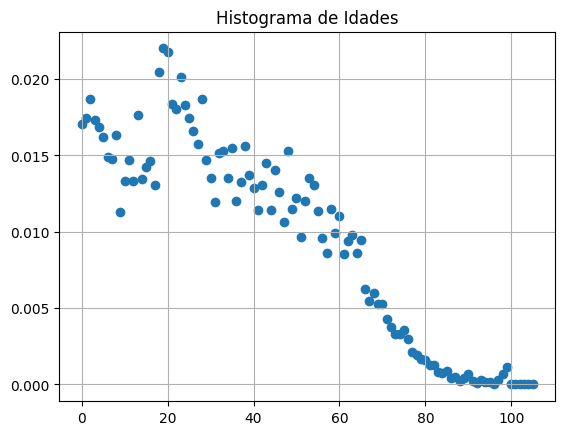

In [13]:
plot_idades(a)

In [15]:
quartis = [0,20,30,50,70,10000]

In [18]:
a = transform_faixa(a,"Idade",quartis)
a = transform_faixa(a,"Contato_idade",quartis)

In [21]:
a

,Contato_idade,id,Idade,IdadeFaixas,Contato_idadeFaixas
0,24.0,Belgica2006_0,22.0,1,1
1,22.0,Belgica2006_0,22.0,1,1
2,22.0,Belgica2006_0,22.0,1,1
3,48.0,Belgica2006_0,22.0,1,2
4,25.0,Belgica2006_0,22.0,1,1
...,...,...,...,...,...
215650,9.0,Zimbabwe_1244,7.0,0,0
215651,9.0,Zimbabwe_1244,7.0,0,0
215652,53.0,Zimbabwe_1244,7.0,0,3
215653,29.0,Zimbabwe_1244,7.0,0,1


In [12]:
polymod = [i for i in a['id'].unique() if('POLYMOD' in i)]
polymod = a[a['id'].isin(polymod)]

In [13]:
polymod

,Contato_idade,id,Idade,IdadeFaixas,Contato_idadeFaixas
58662,42.0,POLYMOD_0,8.0,0,2
58663,9.0,POLYMOD_0,8.0,0,0
58664,42.0,POLYMOD_0,8.0,0,2
58665,8.0,POLYMOD_0,8.0,0,0
58666,29.0,POLYMOD_0,8.0,0,1
...,...,...,...,...,...
156561,11.0,POLYMOD_7286,14.0,0,0
156562,3.0,POLYMOD_7286,14.0,0,0
156563,43.0,POLYMOD_7286,14.0,0,2
156564,33.0,POLYMOD_7286,14.0,0,2


In [14]:
contagem = pd.crosstab(polymod['id'], polymod['Contato_idadeFaixas']).values
faixas = polymod.drop_duplicates(subset='id')['IdadeFaixas'].values

In [15]:
np.mean(np.sum(contagem,axis = 1))

13.531506468215328

In [22]:
contagem = pd.crosstab(a['id'], a['Contato_idadeFaixas']).values
faixas = a.drop_duplicates(subset='id')['IdadeFaixas'].values

In [144]:
data = pd.read_csv('./output/participantes.csv')
contatos01 = pd.read_csv('./output/contatos_01.csv')

In [140]:
contatos01 = pd.crosstab(contatos01['id'], contatos01['faixas']).values

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [141]:
contagem = np.array(list(contagem) + list(contatos01))

In [142]:
contagem

array([[ 0, 14,  2,  2,  0],
       [18,  6,  7,  0,  0],
       [48,  6, 17,  5,  2],
       ...,
       [ 4,  1,  4,  0,  0],
       [ 2,  0,  5,  1,  0],
       [ 2,  0,  8,  3,  1]])

In [145]:
faixas2 = contatos01.drop_duplicates(subset='id')['id'].values

In [151]:
faixas2 = data[data['id'].isin(faixas2)]['Faixas'].values

In [153]:
faixas = np.array(list(faixas) + list(faixas2))

In [97]:
contagem.shape

(16100, 5)

array([[0.        , 0.77777778, 0.11111111, 0.11111111, 0.        ],
       [0.58064516, 0.19354839, 0.22580645, 0.        , 0.        ],
       [0.61538462, 0.07692308, 0.21794872, 0.06410256, 0.02564103],
       ...,
       [0.36842105, 0.36842105, 0.26315789, 0.        , 0.        ],
       [0.47058824, 0.11764706, 0.11764706, 0.11764706, 0.17647059],
       [0.25      , 0.        , 0.5       , 0.        , 0.25      ]])

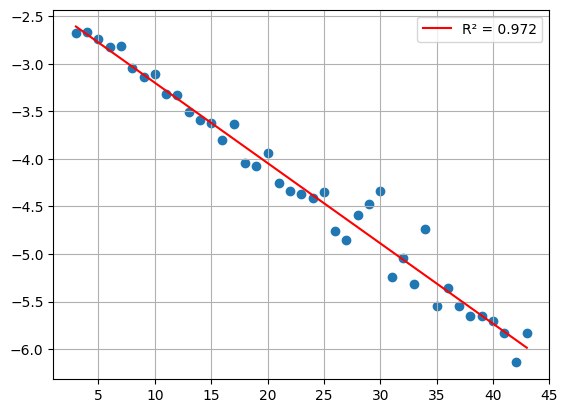

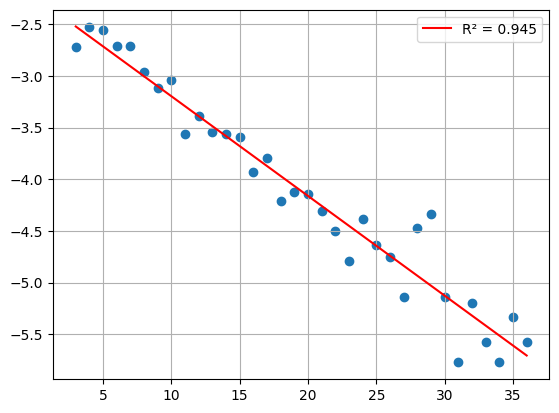

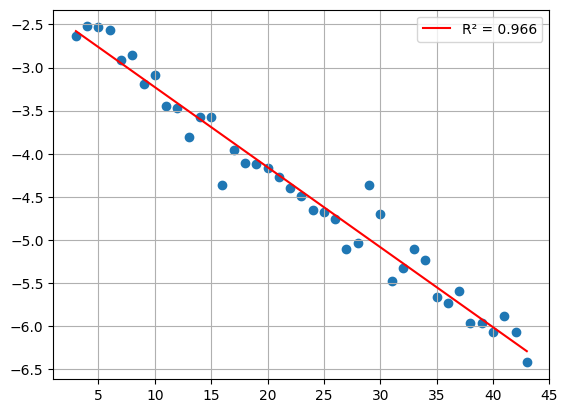

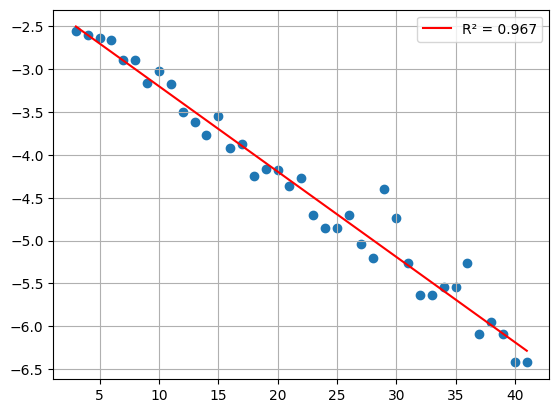

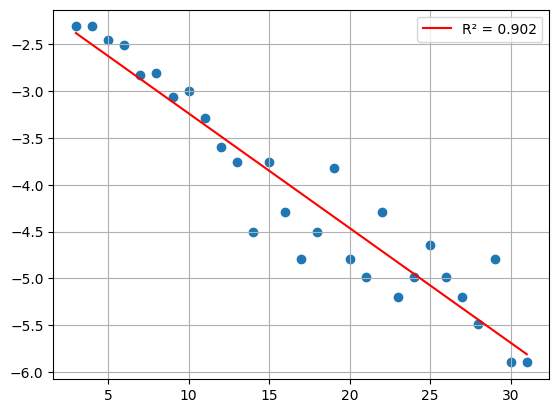

In [126]:
graus = np.sum(contagem,axis = 1)
A = []
B = contagem/(np.sum(contagem,axis = 1)[:, np.newaxis])
B = [np.mean(B[faixas == i,:],axis = 0) for i in range(5)]
C = []
for faixa in range(5):
    g = graus[faixas == faixa]
    x = np.arange(np.max(g)+1)
    x,y = np.unique(g,return_counts=True)
    y = y/np.sum(y)


    y =y[x>2]
    x = x[x>2]
    r = 0
    max_ = 0
    for max in range(100,30,-1):
        teste_y =y[x<max]
        teste_x = x[x<max]
        alpha, beta,r2 = LM(teste_x,np.log(teste_y),-1)
        if(r2 > r):
            r = r2
            max_ = max
    y =y[x<max_]
    x = x[x<max_]
    alpha, beta,r2 = LM(x,np.log(y),-1)
    C.append(beta)
    A.append(alpha)
    plt.scatter(x,np.log(y))
    plt.plot(x,x*alpha + beta,c = 'red',label = 'R² = {:.3f}'.format(r2))
    plt.grid()
    plt.legend()
    plt.show()

In [128]:
np.savetxt("./C/dados/lambda.txt",-np.array(A),fmt = "%f")
np.savetxt("./C/dados/multi_probability.txt",np.array(B),fmt = "%f")
np.savetxt("./C/dados/multi_constant.txt",np.exp(np.array(C)),fmt = "%f")

In [127]:
B

[array([0.31992021, 0.12789526, 0.33301633, 0.12807752, 0.09109068]),
 array([0.29218782, 0.1254267 , 0.33915774, 0.16824015, 0.07498758]),
 array([0.31644174, 0.11237026, 0.33643749, 0.14731221, 0.0874383 ]),
 array([0.31974617, 0.11311296, 0.34895314, 0.13218749, 0.08600023]),
 array([0.35019062, 0.09188984, 0.34608286, 0.12168722, 0.09014947])]

In [87]:
all_faixas

array([5111, 2892, 4294, 3076,  727])

In [93]:
14/2892,18/5111

(0.004840940525587829, 0.0035218156916454707)

array([0.00089329, 0.00062874, 0.00097148, 0.0005895 , 0.00135544])

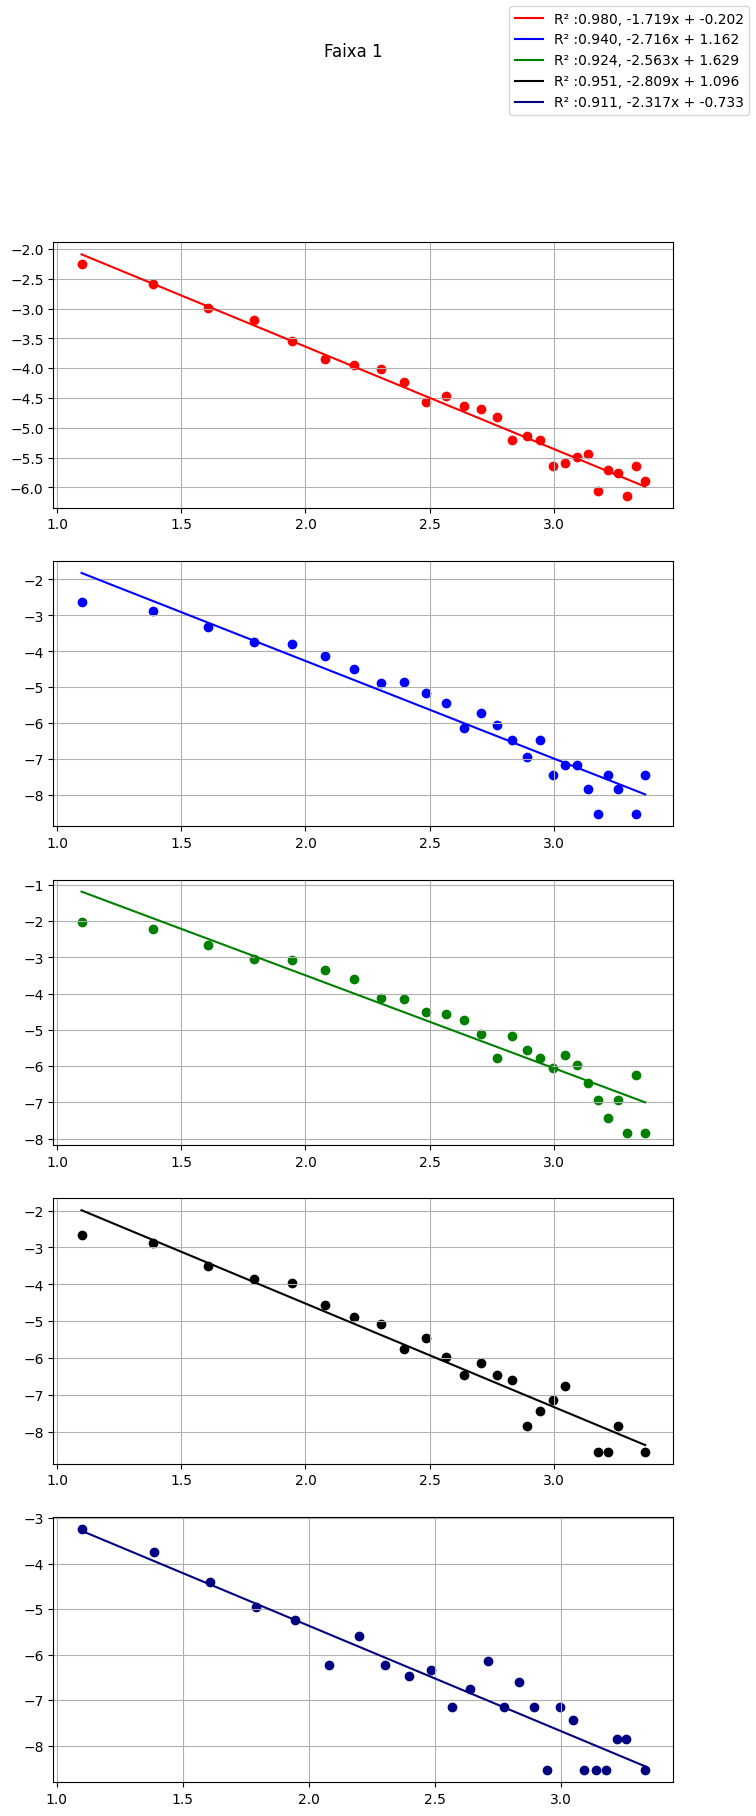

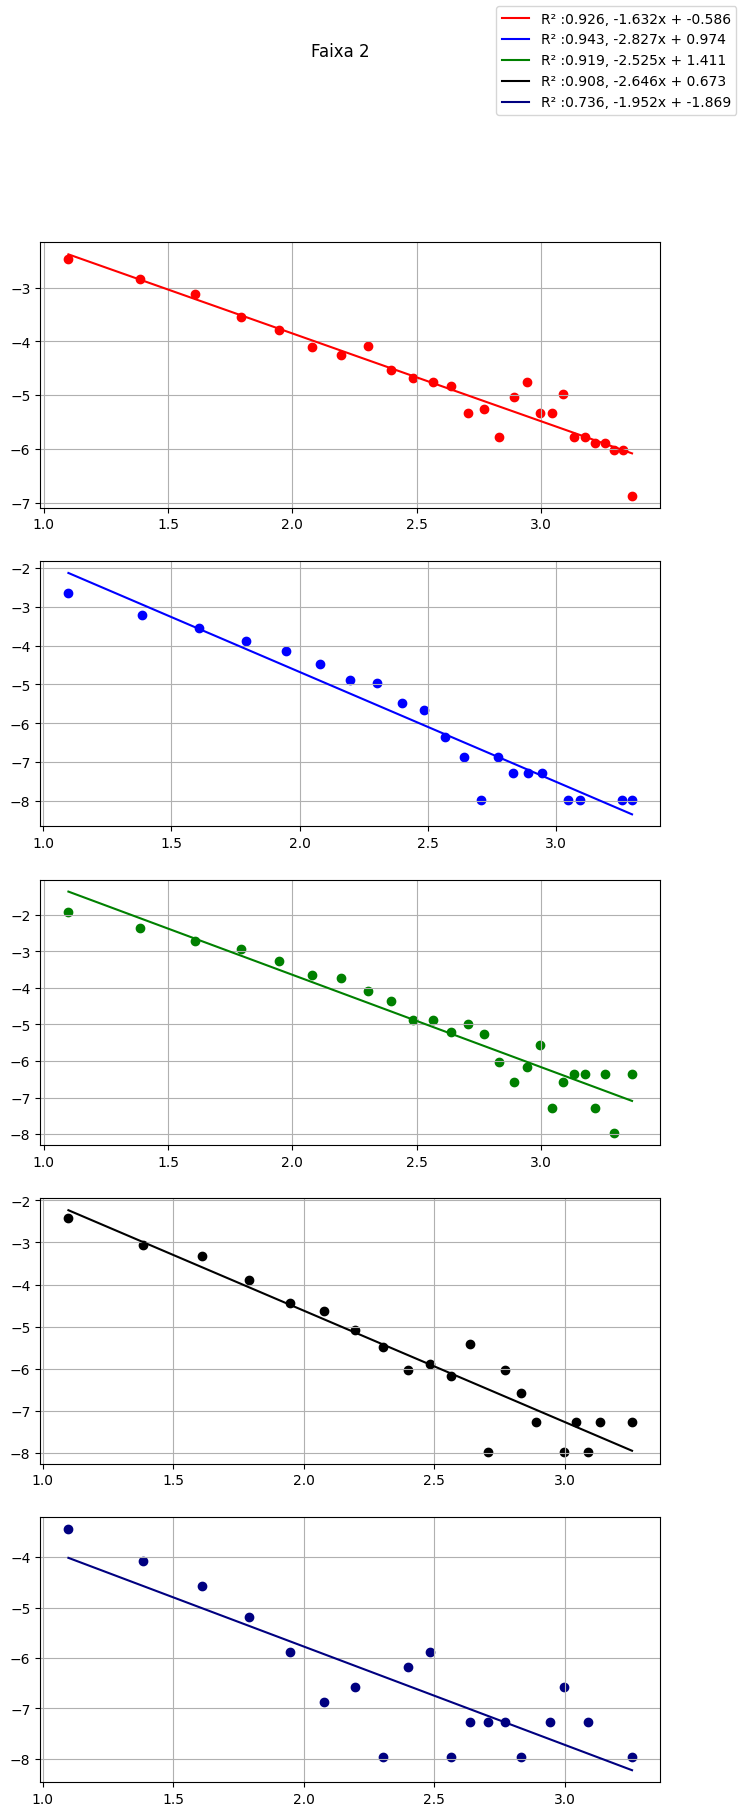

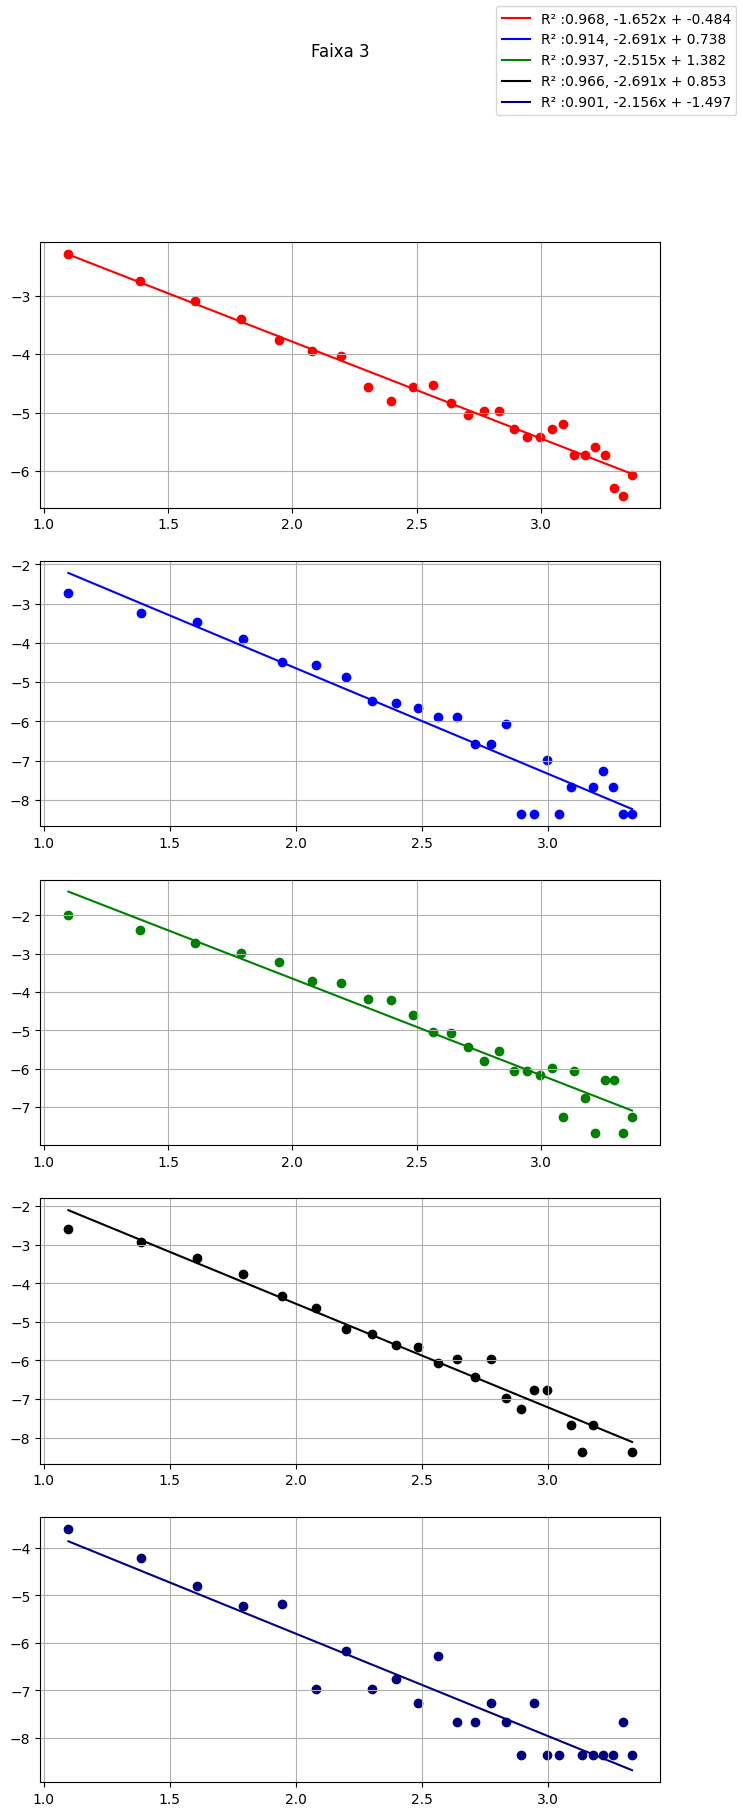

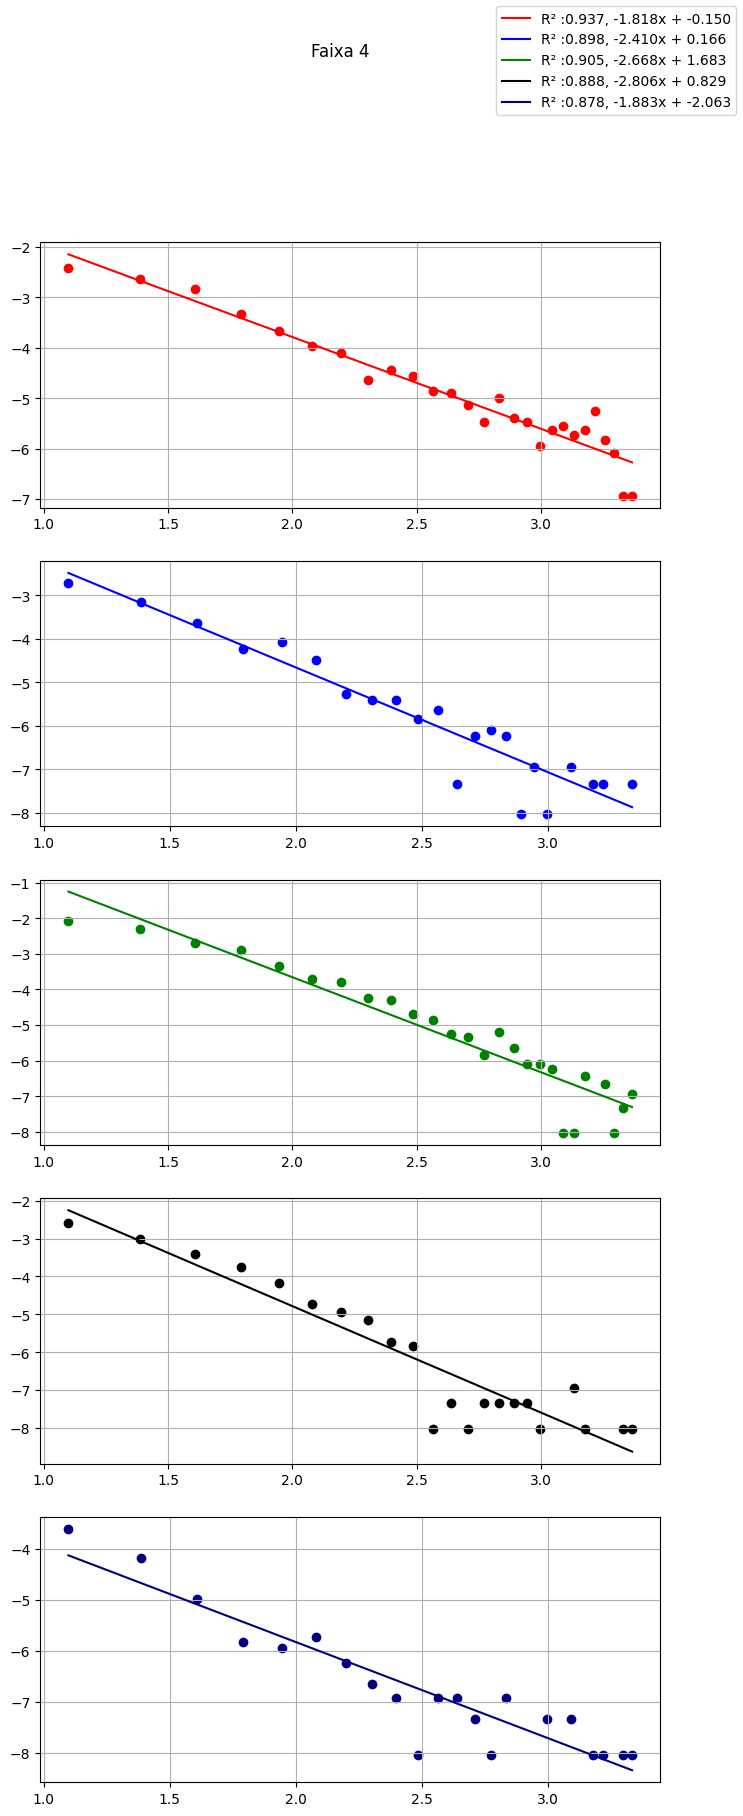

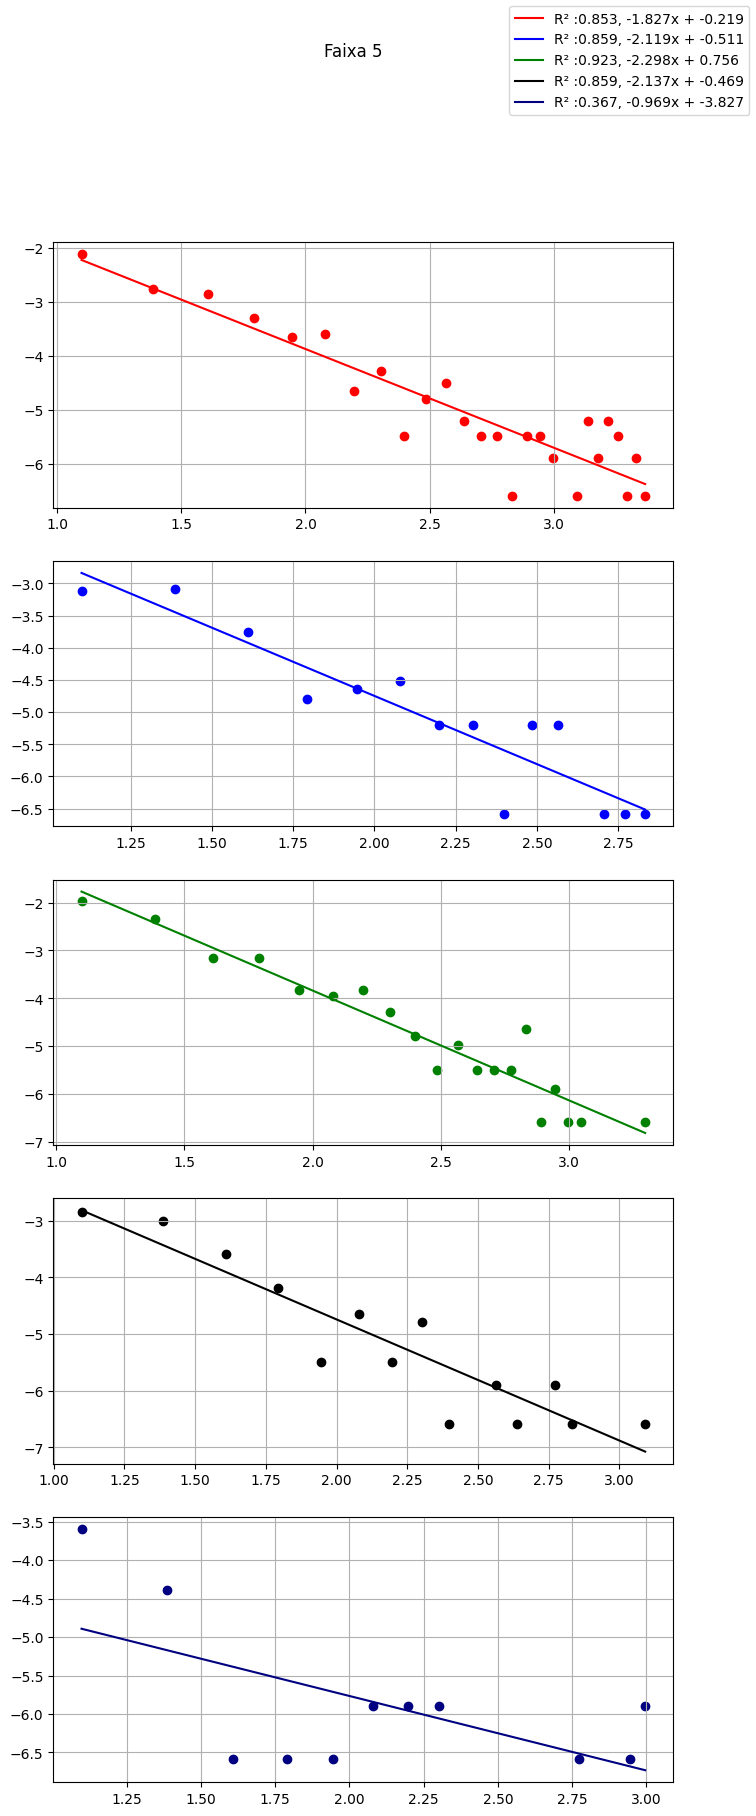

In [44]:
M,A = degree_distribution(contagem,faixas,1)
np.savetxt("./C/dados/geometry.txt",M,fmt = '%f')
np.savetxt("./C/dados/constant.txt",np.exp(A),fmt = '%f')

In [130]:
def comparacao(graus,faixas,tem_plot = 1):
    Graus = np.loadtxt("./C/dados/graus_finais.txt")
    faixas_ = np.loadtxt("./C/dados/faixas_finais.txt")
    M = np.zeros((5,5))
    for faixa in range(5):
        if(tem_plot == 1):
            fig, axs = plt.subplots(5,figsize=(8, 20))
        for plotinho in range(5):

            g = Graus.T[plotinho][faixas_ == faixa]
            c = graus.T[plotinho][faixas == faixa]
            C = np.sqrt(-0.5*np.log(0.05/2))*np.sqrt((len(g)+len(c))/(len(g)*len(c)))

            x = np.arange(np.max(g)+1 if(np.max(g) > np.max(c)) else np.max(c)+1)
            hist = np.zeros(len(x))
            hist2 = np.zeros(len(x))
            for i,j in zip(g,c):
                hist[int(i)] += 1
                hist2[int(j)] += 1
            
            hist = hist/np.sum(hist)
            hist2 = hist2/np.sum(hist2)
            if(tem_plot == 1):
                axs[plotinho].bar(x,hist, label = 'Rede',zorder = 1,alpha = 0.75)
                axs[plotinho].bar(x,hist2, label = 'Dados',zorder = 0)
                axs[plotinho].grid()
                axs[plotinho].legend()
                axs[plotinho].set_xlim(-0.5,50)

            for i in range(1,len(hist)):
                hist[i] += hist[i-1]
                hist2[i] += hist2[i-1]
            D = np.max(np.abs(hist - hist2))
            M[faixa][plotinho] = D < C
        if(tem_plot == 1):
            fig.suptitle(f"Faixa {faixa+1}")
            plt.show()
    print(M)

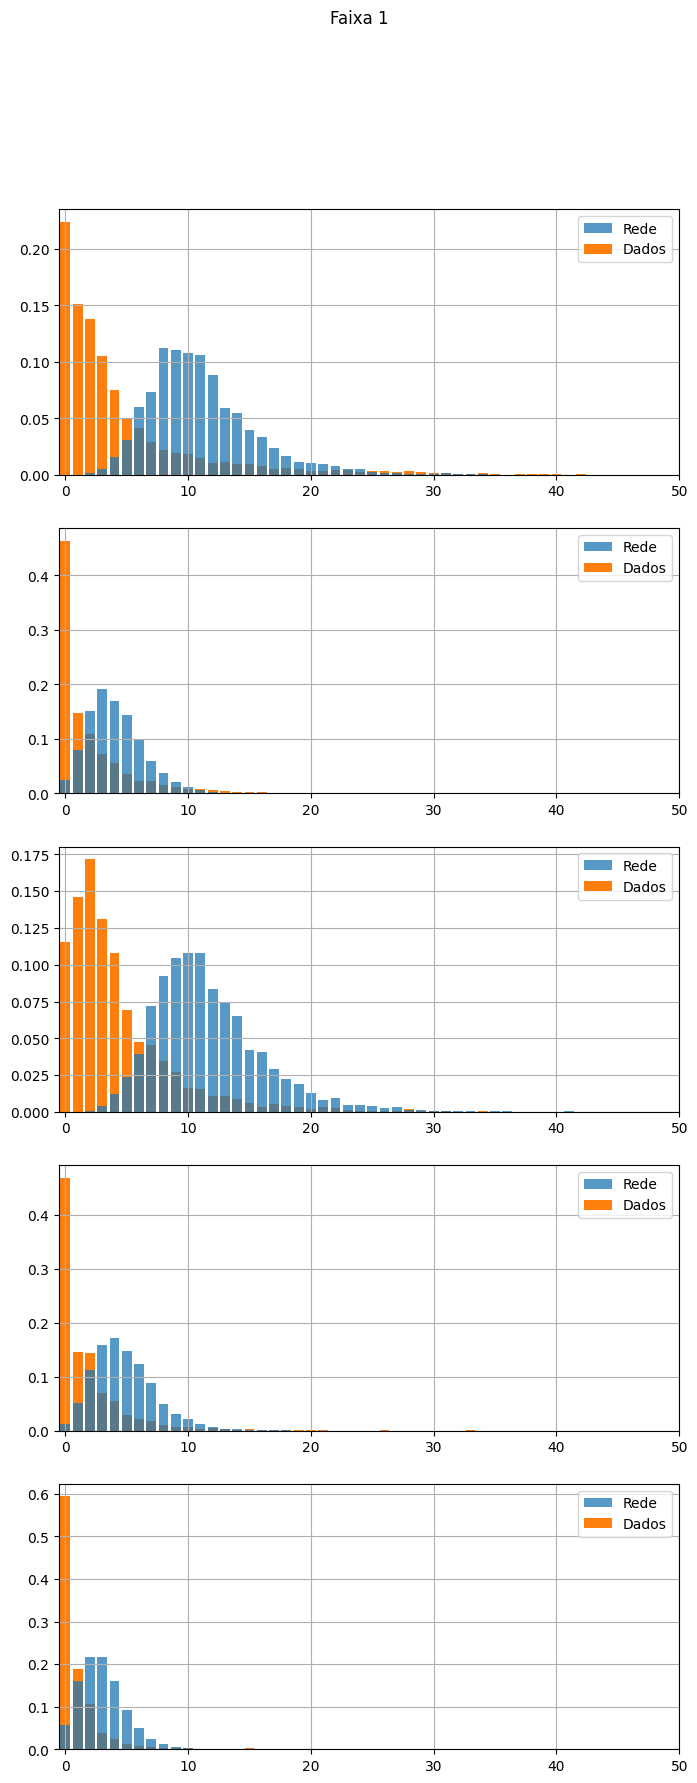

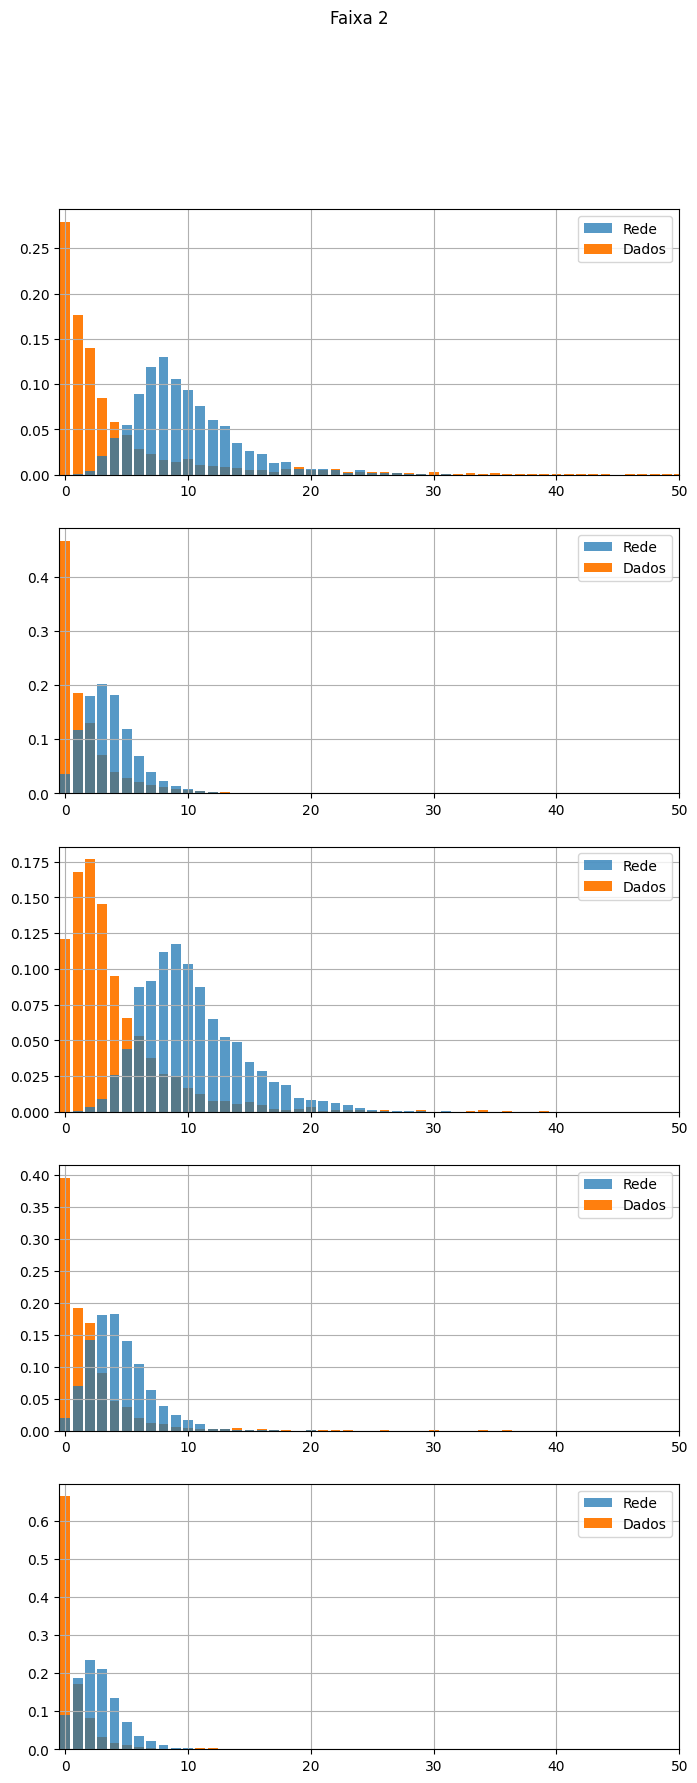

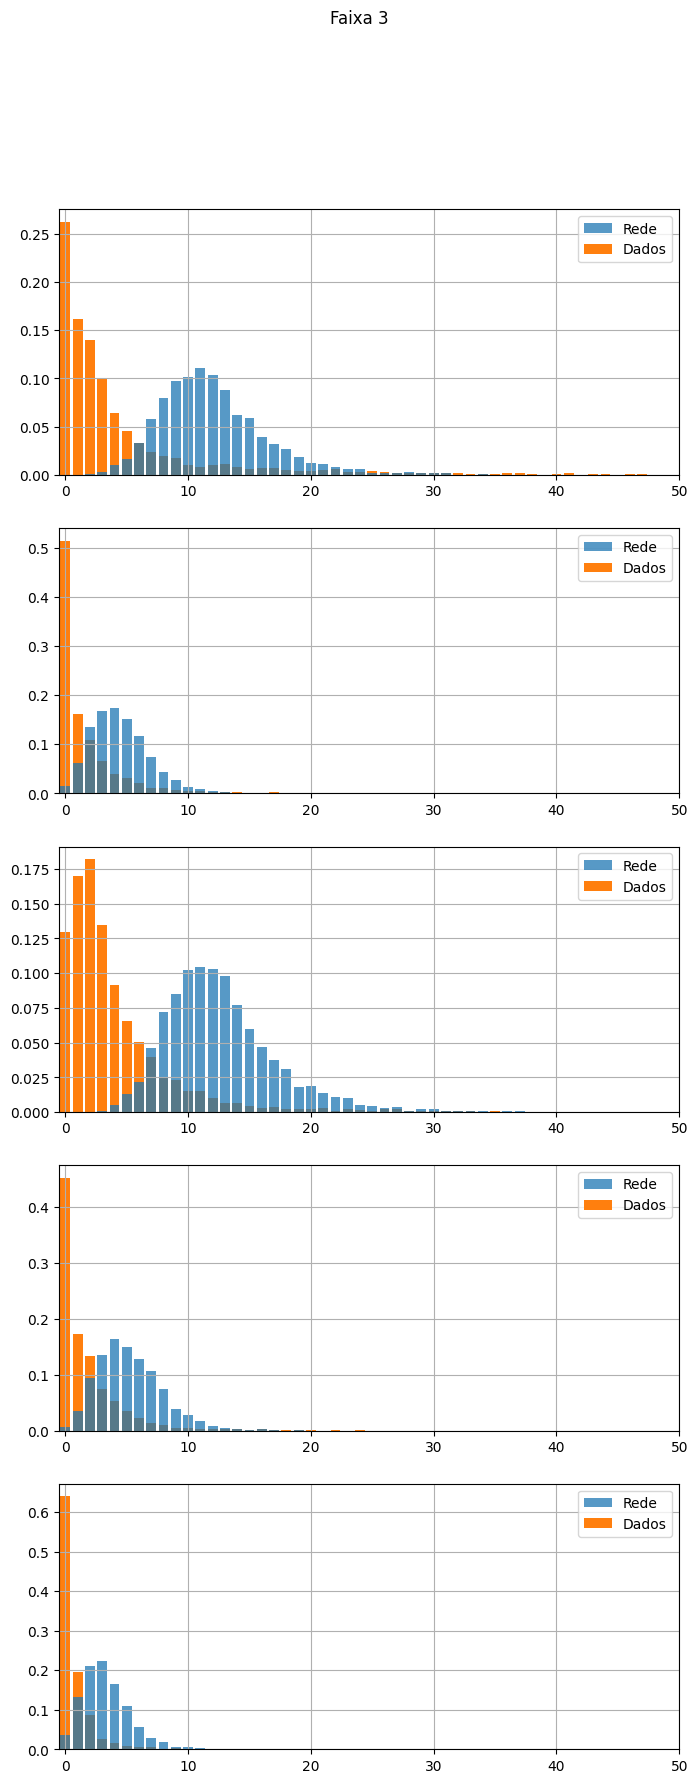

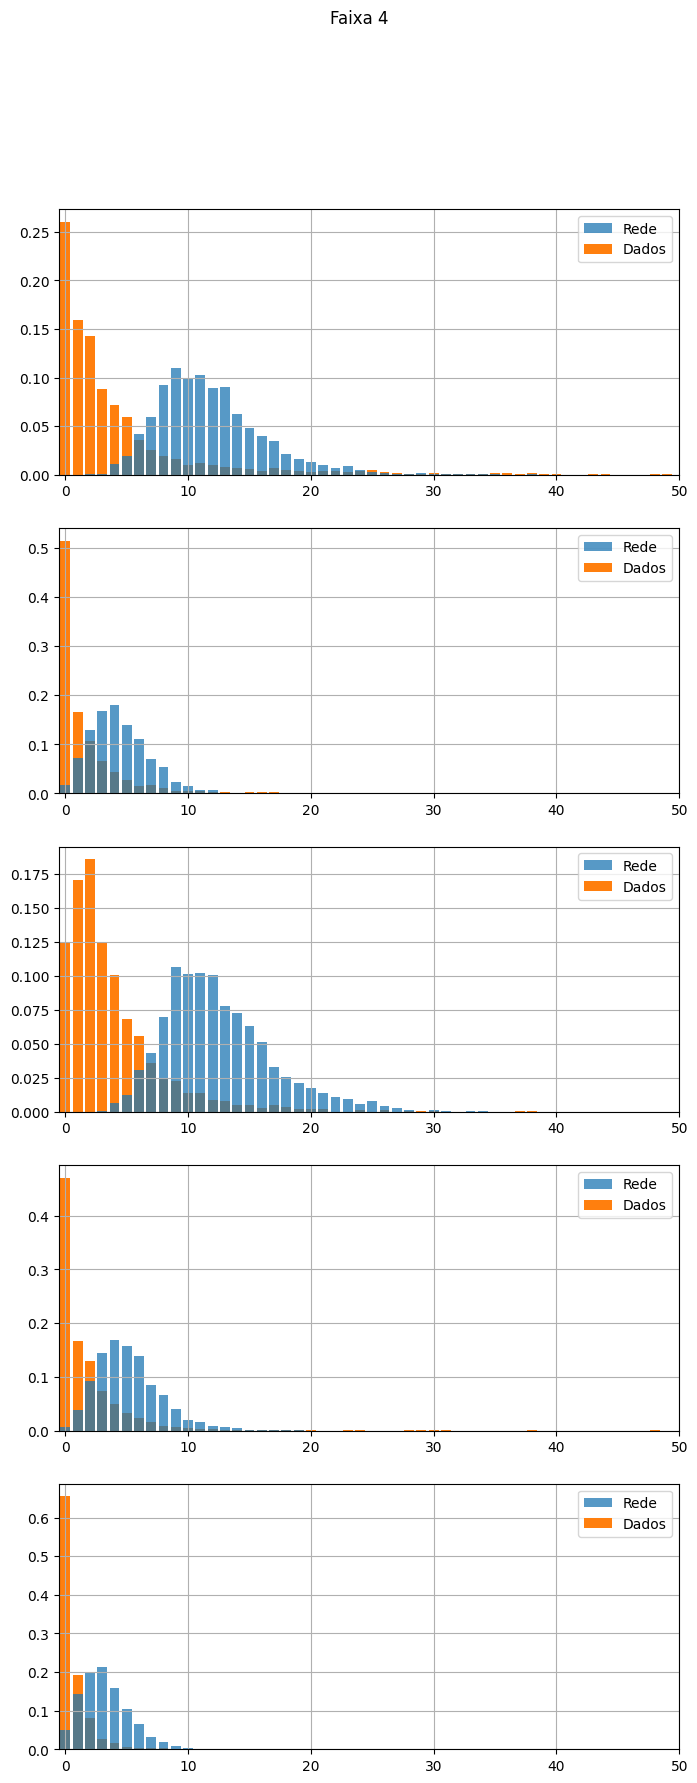

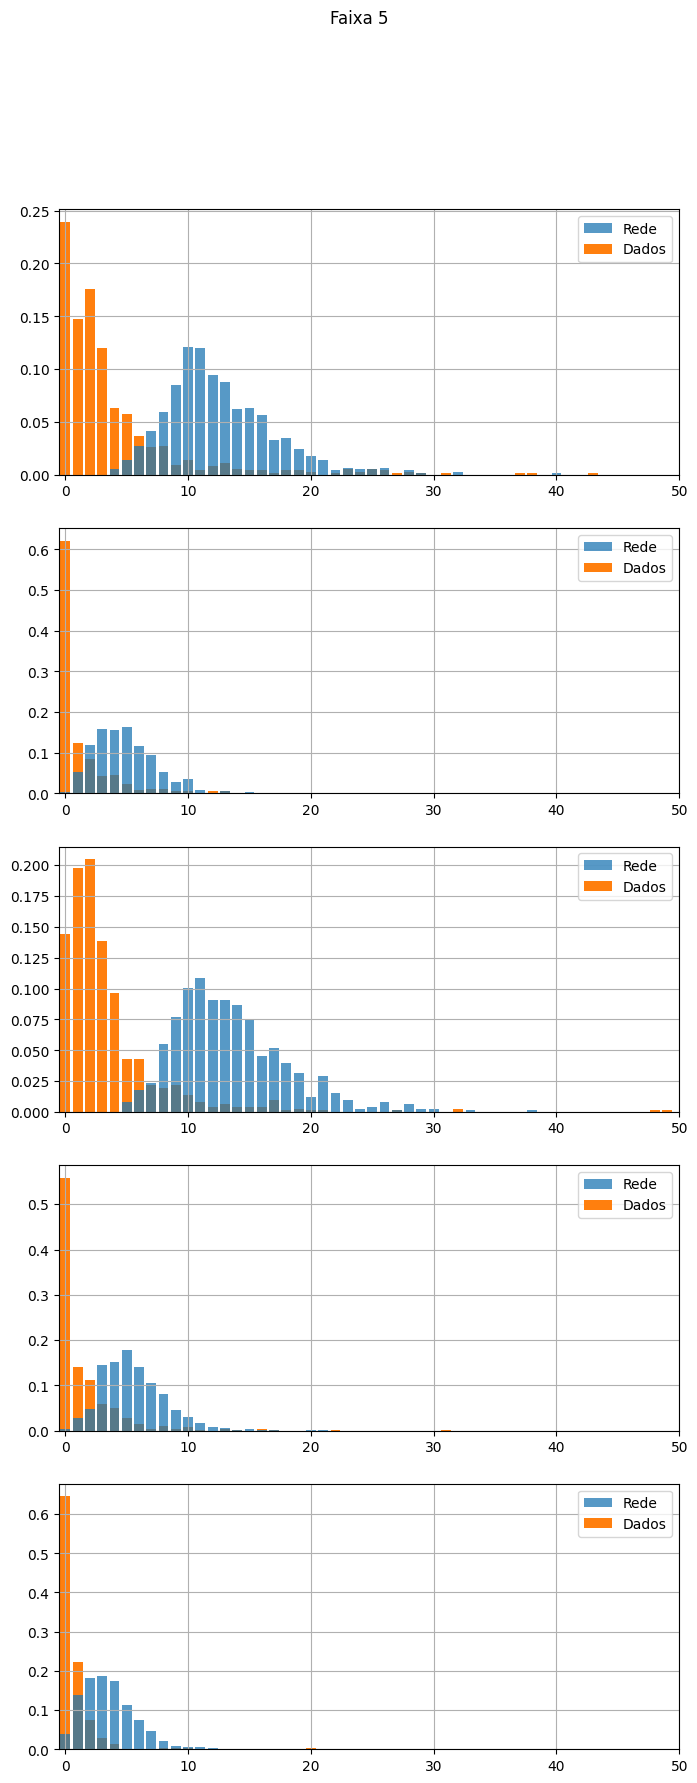

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [133]:
comparacao(contagem,faixas,1)

In [35]:
contagem.shape

(7189, 5)

In [62]:
a

,Contato_idade,id,Idade,IdadeFaixas,Contato_idadeFaixas
0,24.0,Belgica2006_0,22.0,1,1
1,22.0,Belgica2006_0,22.0,1,1
2,22.0,Belgica2006_0,22.0,1,1
3,48.0,Belgica2006_0,22.0,1,3
4,25.0,Belgica2006_0,22.0,1,1
...,...,...,...,...,...
215650,9.0,Zimbabwe_1244,7.0,0,0
215651,9.0,Zimbabwe_1244,7.0,0,0
215652,53.0,Zimbabwe_1244,7.0,0,3
215653,29.0,Zimbabwe_1244,7.0,0,1


In [58]:
_,y = np.unique(polymod["id"].values,return_counts=True)

In [59]:
y

array([20,  4,  8, ...,  4,  6,  6])

In [18]:
def calculate_hist(y):
    x = np.array(range(0,np.max(y)+1))
    hist = np.zeros(len(x))
    for i in y:
        for j in range(len(x)):
            if(i<x[j]):
                hist[j] += 1
                break
    x = x[hist != 0]
    hist = hist[hist != 0]

    hist = hist[x>=5]
    x = x[x >= 5]
    plt.scatter(x,hist)
    plt.grid()
    plt.show()
    return x,hist

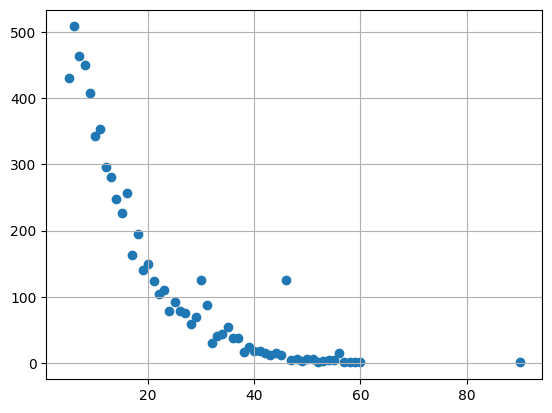

In [60]:
x,hist = calculate_hist(y)

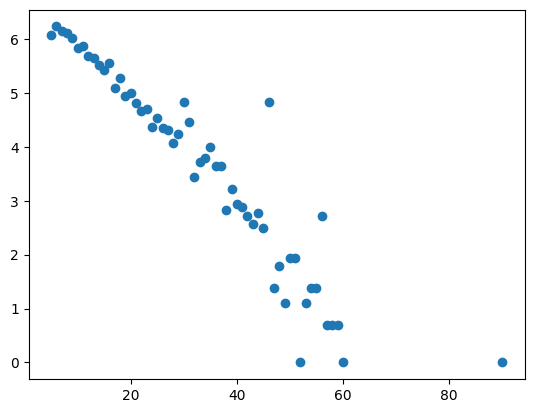

In [61]:
plt.scatter(x,np.log(hist))

0.00879222582137899 0.007168469112927809
Coeficientes: [-0.09933132]
Intercepto: 6.956769962622324
Coeficiente de determinação (R²): 0.9100737825182764


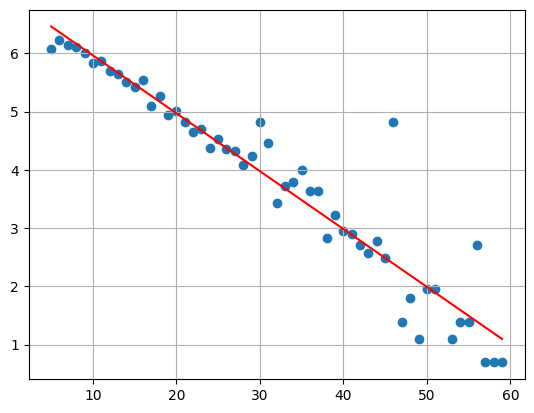

In [63]:
print(1/np.mean(hist),np.sqrt(1/np.var(hist)))
hist = np.log(hist)
regressor = LinearRegression()

x = x[hist != 0]
hist = hist[hist != 0]
y = hist

y = y[x < 100]
x = x[x < 100]potentia(probability[faixa[i]][j],constant[faixa[i]][j]);

X = x.reshape(-1,1)
regressor.fit(X, y)
coeficientes = regressor.coef_
intercepto = regressor.intercept_

# Calcular o coeficiente de determinação (R²)
r2 = regressor.score(X, y)
print("Coeficientes:", coeficientes)
print("Intercepto:", intercepto)
print("Coeficiente de determinação (R²):", r2)

plt.scatter(x,y)
plt.plot(x,x*coeficientes[0] + intercepto, c = 'red')
plt.grid()
plt.show()

In [104]:
a

,Contato_idade,id,Idade,IdadeFaixas,Contato_idadeFaixas
0,24.0,Belgica2006_0,22.0,1,1
1,22.0,Belgica2006_0,22.0,1,1
2,22.0,Belgica2006_0,22.0,1,1
3,48.0,Belgica2006_0,22.0,1,2
4,25.0,Belgica2006_0,22.0,1,1
...,...,...,...,...,...
215650,9.0,Zimbabwe_1244,7.0,0,0
215651,9.0,Zimbabwe_1244,7.0,0,0
215652,53.0,Zimbabwe_1244,7.0,0,3
215653,29.0,Zimbabwe_1244,7.0,0,1


In [103]:
def hist_faixa(data,idade,bins = 10):
    ids = data[data['IdadeFaixas'] == idade]["id"].values
    _,y = np.unique(a[a["id"].isin(ids)]["id"].values,return_counts=True)

    x,hist = calculate_hist(y)
    #x = np.log(x)
    print(np.mean(hist),np.var(hist))
    hist = np.log(hist)
    regressor = LinearRegression()

    x = x[hist != 0]
    hist = hist[hist != 0]
    y = hist

    y = y[x < 100]
    x = x[x < 100]

    X = x.reshape(-1,1)
    regressor.fit(X, y)
    coeficientes = regressor.coef_
    intercepto = regressor.intercept_

    # Calcular o coeficiente de determinação (R²)
    r2 = regressor.score(X, y)
    print("Coeficientes:", coeficientes)
    print("Coeficiente de determinação (R²):", r2)

    plt.scatter(x,y)
    plt.plot(x,x*coeficientes[0] + intercepto, c = 'red')
    plt.grid()
    plt.show()

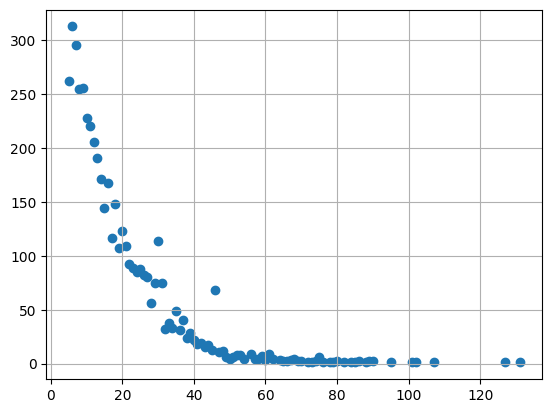

55.83529411764706 6363.431695501729
Coeficientes: [-0.07168121]
Intercepto: 6.073351625928394
Coeficiente de determinação (R²): 0.9262253929396546


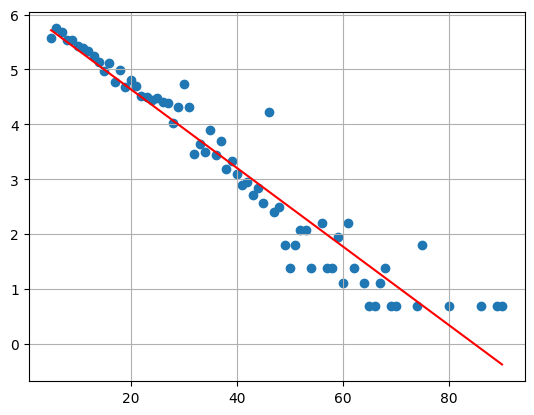

In [102]:
hist_faixa(a,0,2000)